In [1]:
import string
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
data=pd.read_csv(r"C:\Users\dell\Desktop\projects\netflix recommendation system\netflix_titles.csv")


In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
#shape
data.shape

(8807, 12)

In [5]:
#size
data.size

105684

In [6]:
#column name
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
#dtype
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [10]:
pd.DataFrame({'Total missing values':data.isna().sum(),
              'Percentage':(data.isna().sum()/len(data))*100})

,Total missing values,Percentage
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
director,2634,29.908028
cast,825,9.367549
country,831,9.435676
date_added,10,0.113546
release_year,0,0.000000
rating,4,0.045418
duration,3,0.034064


<AxesSubplot:>

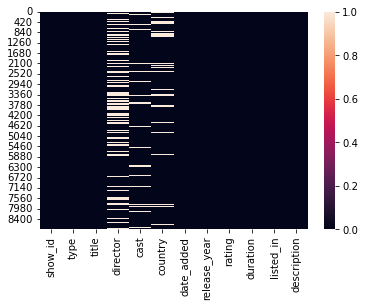

In [11]:
# using heatmap to show count of null values
sns.heatmap(data.isnull())

<AxesSubplot:>

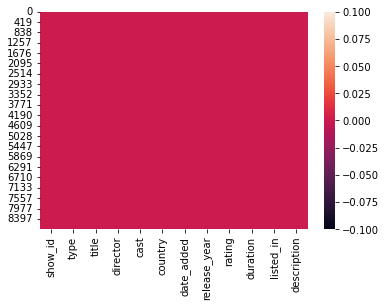

In [12]:
# handeling null value in columns
data["director"]=data["director"].fillna("No Director Specified")
data["cast"]=data["cast"].fillna("No Cast Specified")
data["country"]=data["country"].fillna("No Country Specified")
data=data.dropna()             #no null value in data
# using heatmap to show count of null values
sns.heatmap(data.isnull())

# Visualization

<AxesSubplot:xlabel='type', ylabel='count'>

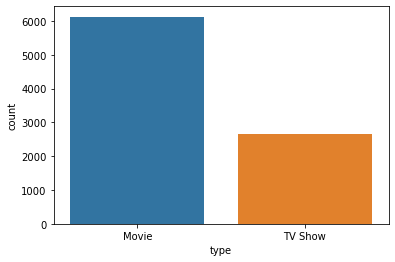

In [13]:
# To group all unique item of a column (type) and show their count
data.groupby("type").type.count()
# To show the count of all the unique values of any column in the form of bar graph
sns.countplot(data["type"])


Total number of different ratings are  14
      rating  counts
0          G      41
1      NC-17       3
2         NR      79
3         PG     287
4      PG-13     490
5          R     799
6      TV-14    2157
7       TV-G     220
8      TV-MA    3205
9      TV-PG     861
10      TV-Y     306
11     TV-Y7     333
12  TV-Y7-FV       6
13        UR       3


Text(0.5, 1.0, 'Count of Movies/Shows by Rating')

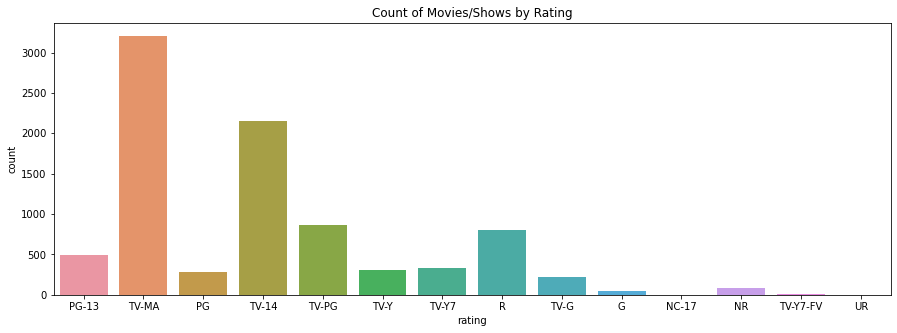

In [14]:
# total no. of different ratings
print("Total number of different ratings are " ,data["rating"].nunique())
# name of unique value in rating column
# print("Types of ratings are:" , data["rating"].unique())
# distribution of content rating on Netflix
ratings=data.groupby(["rating"]).size().reset_index(name="counts")
print(ratings)
# # pie chart
# ratings.groupby(["rating"]).sum().plot(kind='pie',radius=5,autopct='%1.0f%%', y= "counts")
# Count of movies/shows in each rating category
plt.figure(figsize = (15,5))
sns.countplot(x = "rating", data = data)
plt.title("Count of Movies/Shows by Rating")

Text(0.5, 1.0, 'Frequency of Movie/Show Releases over Time')

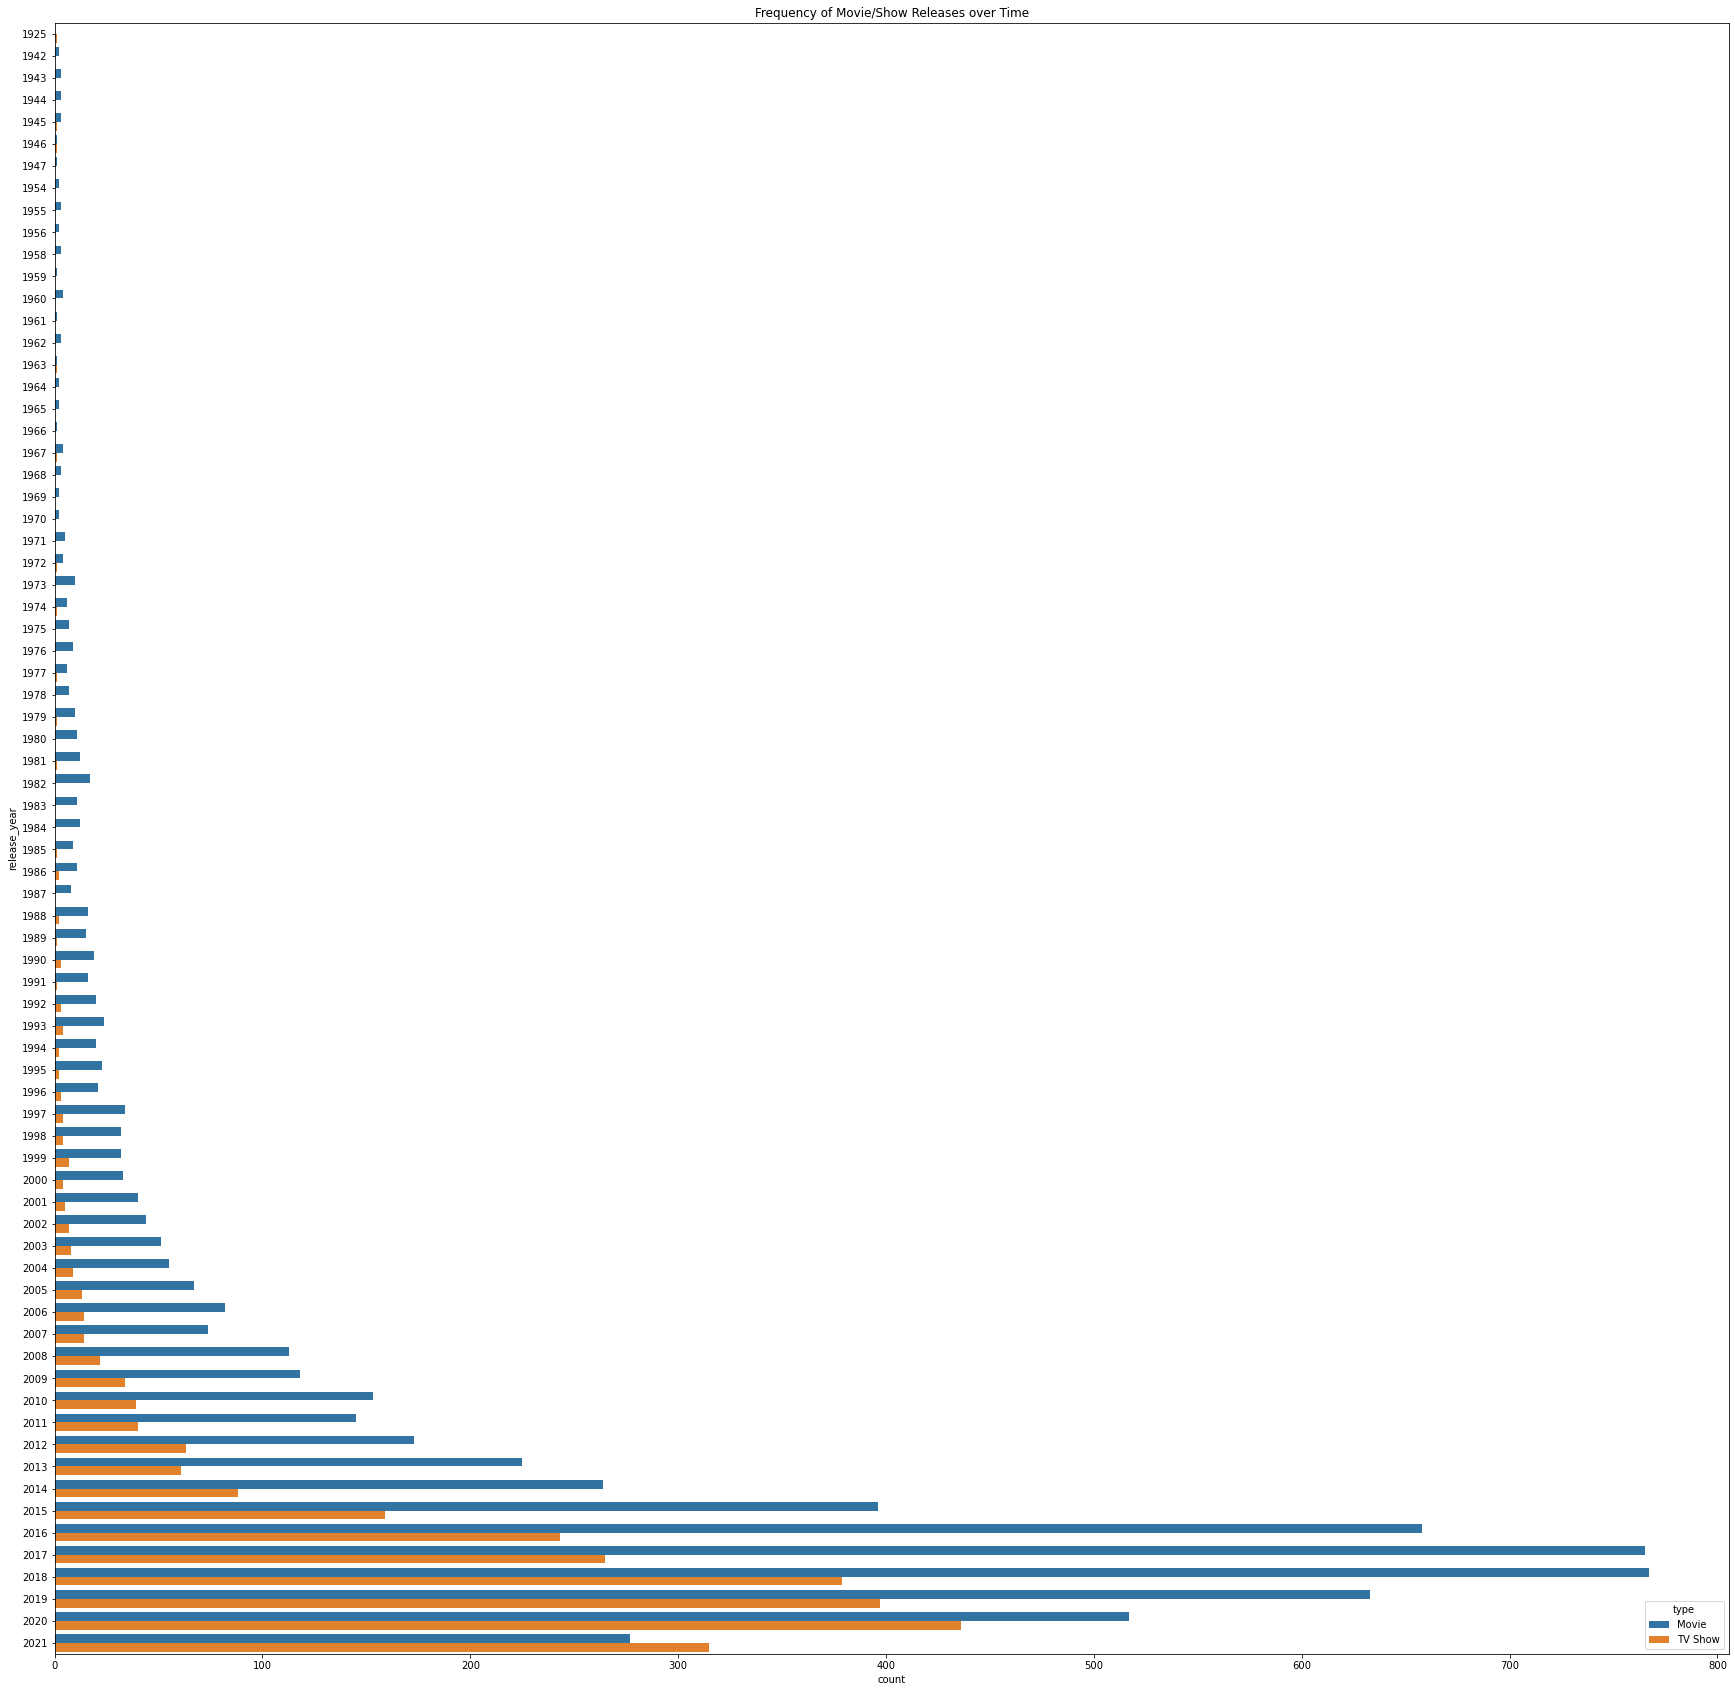

In [15]:
# Number of releases by year
plt.figure(figsize = (30,30))
sns.countplot(y = "release_year", data = data, hue = "type")
plt.title("Frequency of Movie/Show Releases over Time")



Text(0.5, 1.0, 'Top 5 Movie Genres')

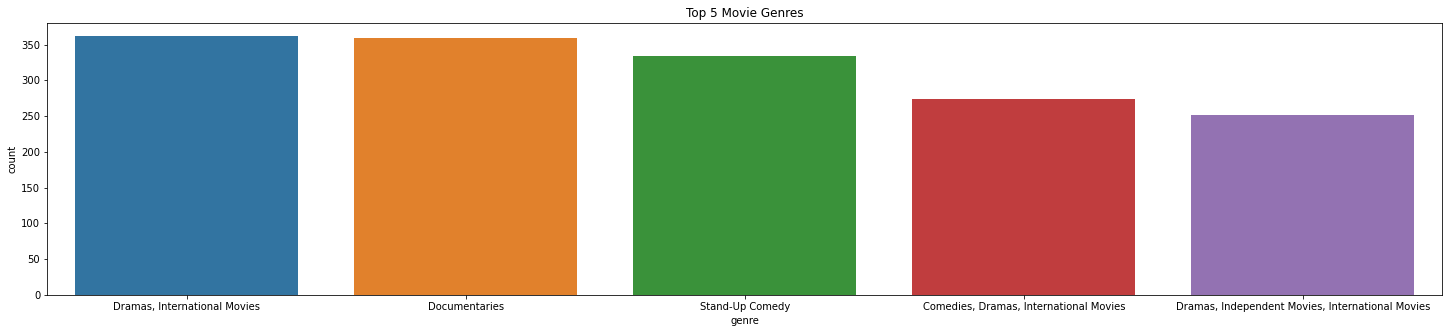

In [16]:
# Top 5 genres of movies
top_movies = data.loc[data["type"] == "Movie"]["listed_in"].value_counts()[:5]
top_movies_df = top_movies.reset_index()
top_movies_df.columns = ["genre", "count"]
plt.figure(figsize = (25,5))
sns.barplot(x = top_movies_df["genre"], y = top_movies_df["count"])
plt.title("Top 5 Movie Genres")

Text(0.5, 1.0, 'Top 5 Show Genres')

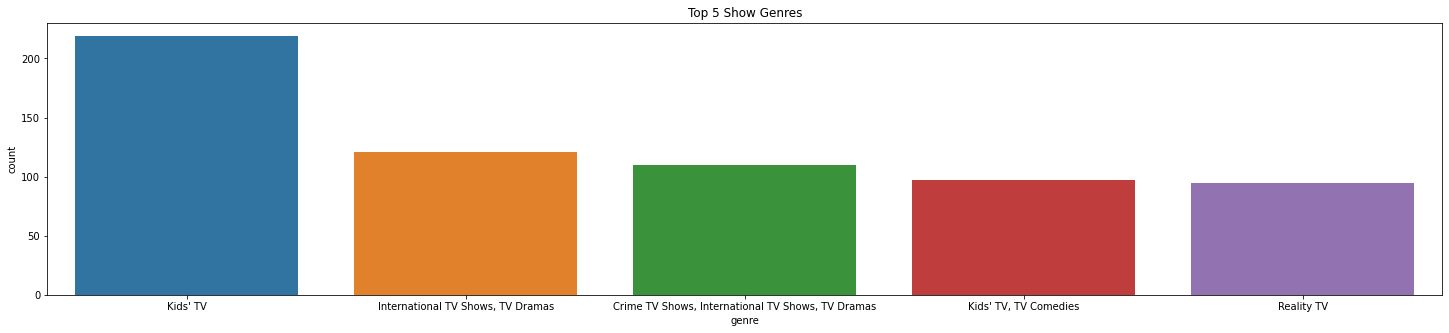

In [17]:
# Top 5 genres of shows
top_shows = data.loc[data["type"] == "TV Show"]["listed_in"].value_counts()[:5]
top_shows_df = top_shows.reset_index()
top_shows_df.columns = ["genre", "count"]

plt.figure(figsize = (25,5))
sns.barplot(x = top_shows_df["genre"], y = top_shows_df["count"])
plt.title("Top 5 Show Genres")

In [18]:
filtered_country=pd.DataFrame()
filtered_country=data['country'].str.split(',',expand=True).stack()
filtered_country=filtered_country.to_frame()
filtered_country.columns=["Country"]
country=filtered_country.groupby(['Country']).size().reset_index(name='Total Count')

country['type']=data['type']
country=country[country.Country !="No Country Specified"]


Text(0.5, 1.0, 'Volume of Movie Production by Country')

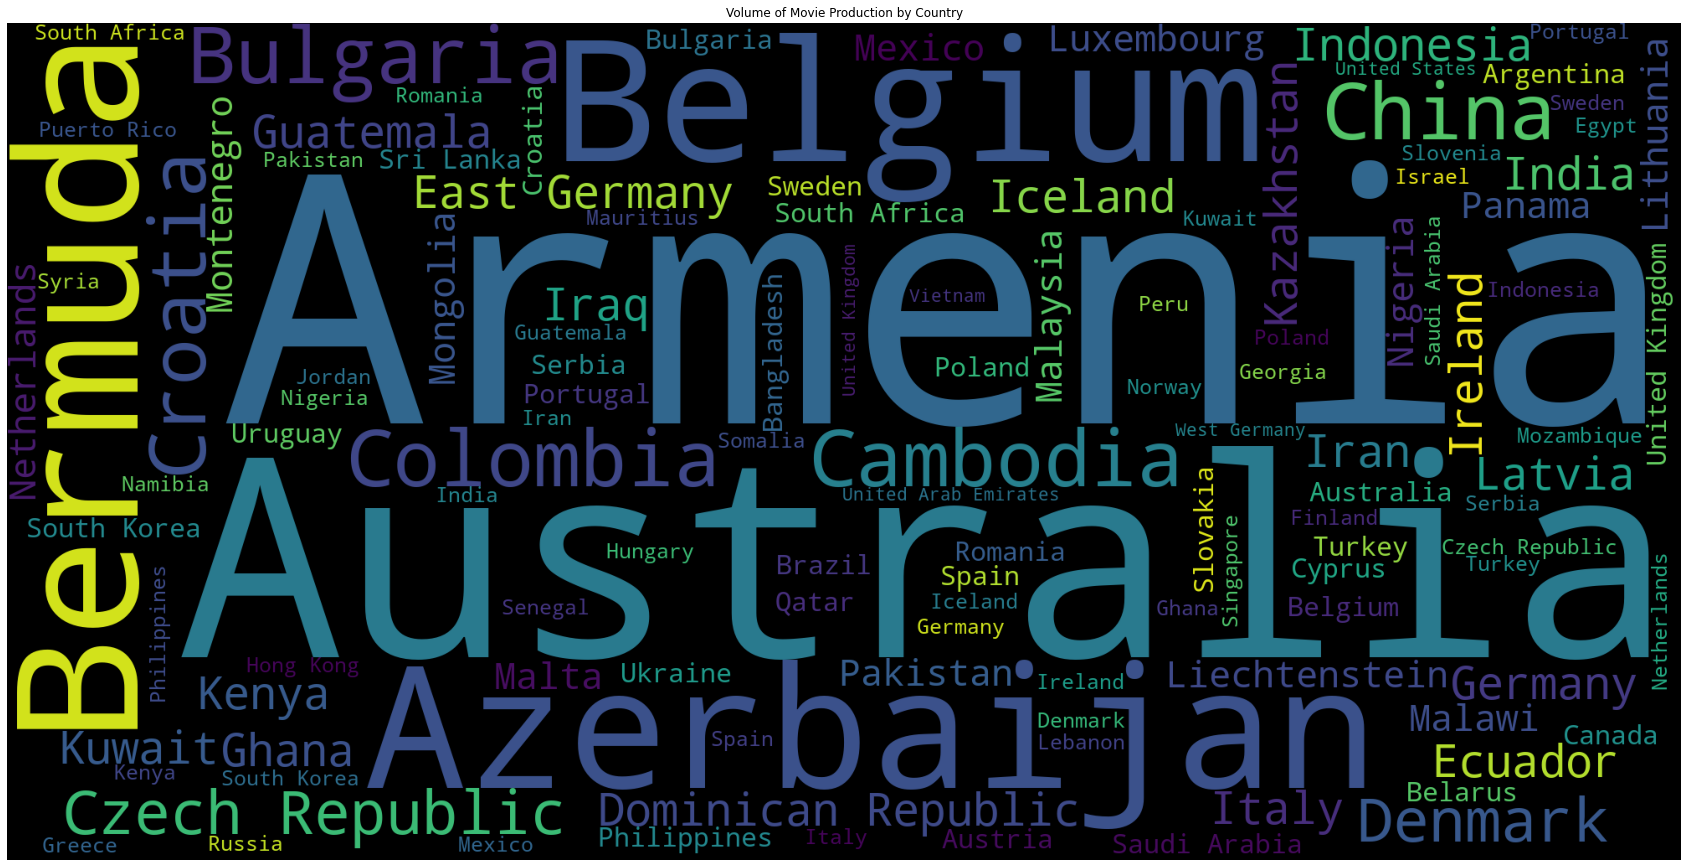

In [19]:
# Wordcloud of countries that produce the most number of movies

countries_movies = []

for i in country.loc[country.type == 'Movie'].Country:
    countries_movies.append(i)
            
counter = Counter(countries_movies)
wordcloud = WordCloud(width = 2000, height = 1000).generate_from_frequencies(counter)

plt.figure(figsize=(30,20))
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Volume of Movie Production by Country")

Text(0.5, 1.0, 'Volume of Movie Production by Country')

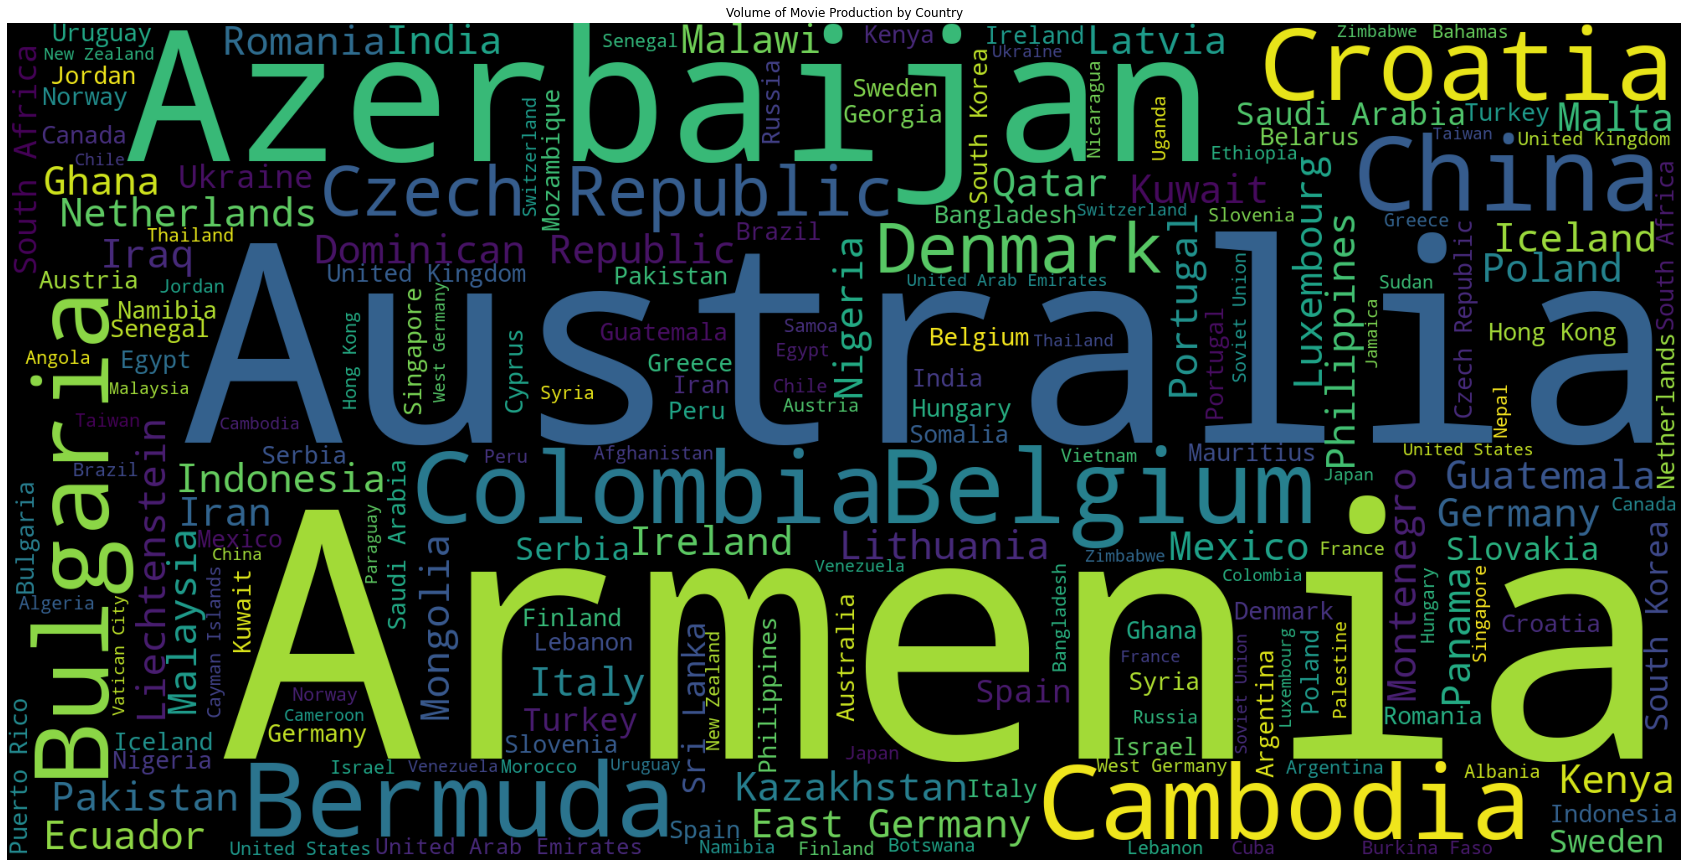

In [20]:
# Wordcloud of countries that produce the most number of movies

countries_shows = []

for i in country.loc[country.type == 'TV Show'].Country:
    countries_movies.append(i)
            
counter = Counter(countries_movies)
wordcloud = WordCloud(width = 2000, height = 1000).generate_from_frequencies(counter)

plt.figure(figsize=(30,20))
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Volume of Movie Production by Country")

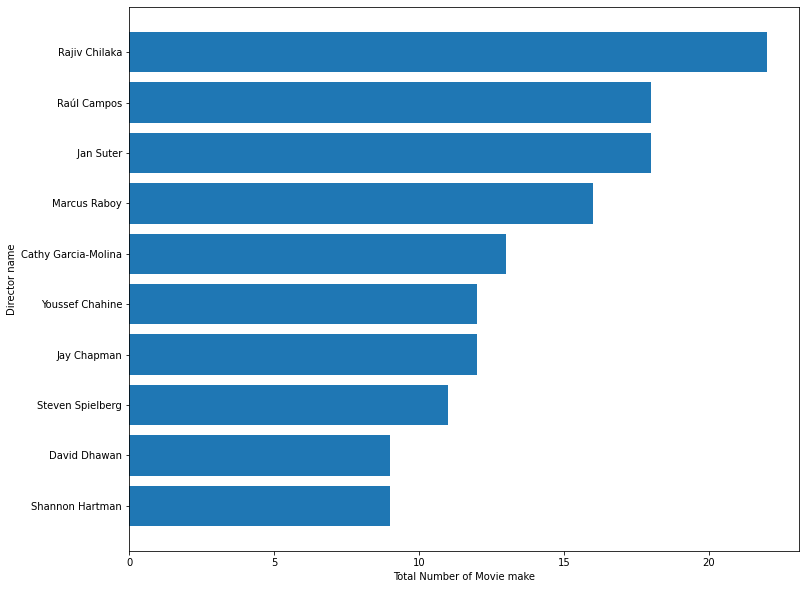

,Director,Total Count,type
4019,Rajiv Chilaka,22,Movie
261,Jan Suter,18,Movie
4066,Raúl Campos,18,Movie
4650,Suhas Kadav,16,TV Show
3233,Marcus Raboy,16,Movie
...,...,...,...
2338,J Blakeson,1,Movie
2339,J. Davis,1,Movie
2340,J. Lee Thompson,1,Movie
2341,J. Michael Long,1,Movie


In [21]:
# creating new dataframe with director names
filtered_Directors=pd.DataFrame()
filtered_Directors=data["director"].str.split(',',expand=True).stack()
filtered_Directors=filtered_Directors.to_frame()
filtered_Directors.columns=["Director"]
filtered_Directors
# creating new dataframe
directors=filtered_Directors.groupby(["Director"]).size().reset_index(name="Total Count")
directors=directors[directors.Director != "No Director Specified"]
directors['type']=data['type']

plt.figure(figsize=(12,10))


directors=directors.sort_values(by=['Total Count'], ascending=False)
directorsTop10=directors[directors['type']=='Movie'].head(10)
directorsTop10=directorsTop10.sort_values(by=['Total Count'])
plt.barh(directorsTop10['Director'],directorsTop10['Total Count'])
plt.xlabel('Total Number of Movie make')
plt.ylabel('Director name')
plt.show()
directors

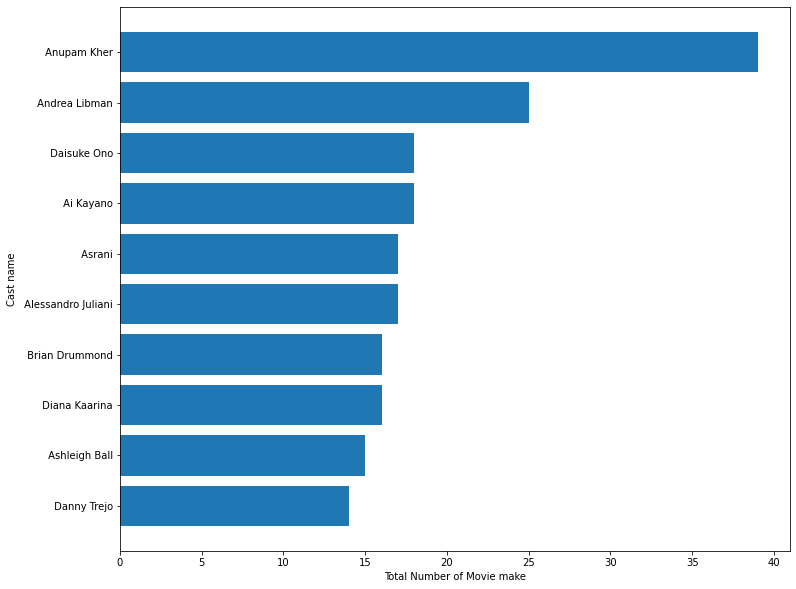

,Cast,Total Count,type
2605,Anupam Kher,39,Movie
26903,Rupa Bhimani,31,NaN
30263,Takahiro Sakurai,30,NaN
15518,Julie Tejwani,28,NaN
23591,Om Puri,27,NaN
...,...,...,...
15272,João Pessanha,1,NaN
15271,João Pedro Zappa,1,NaN
15270,João Lagarto,1,NaN
15269,João Fábio Cabral,1,NaN


In [22]:
# creating new dataframe with director names
filtered_Actors=pd.DataFrame()
filtered_Actors=data["cast"].str.split(',',expand=True).stack()
filtered_Actors=filtered_Actors.to_frame()
filtered_Actors.columns=["Cast"]
filtered_Actors
# creating new dataframe
Actors=filtered_Actors.groupby(["Cast"]).size().reset_index(name="Total Count")
Actors=Actors[Actors.Cast != "No Cast Specified"]
Actors['type']=data['type']

plt.figure(figsize=(12,10))


Actors=Actors.sort_values(by=['Total Count'], ascending=False)
ActorsTop10=Actors[Actors['type']=='Movie'].head(10)
ActorsTop10=ActorsTop10.sort_values(by=['Total Count'])
plt.barh(ActorsTop10['Cast'],ActorsTop10['Total Count'])
plt.xlabel('Total Number of Movie make')
plt.ylabel('Cast name')
plt.show()
Actors

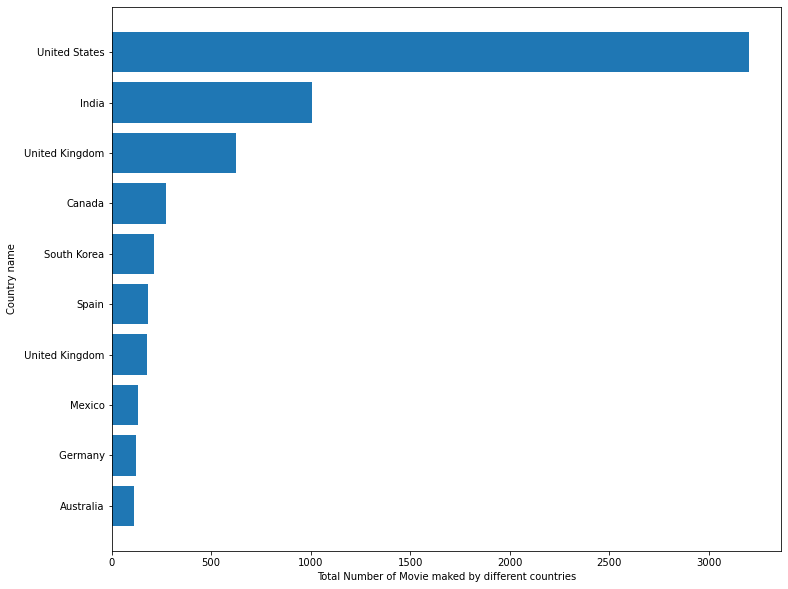

In [23]:
# total no. of movies by different countries
plt.figure(figsize=(12,10))
country_with_movies=country.sort_values(by=['Total Count'], ascending=False)
country_with_Top10_movies=country_with_movies[country_with_movies['type']=='Movie'].head(10)
country_with_Top10_movies=country_with_Top10_movies.sort_values(by=['Total Count'])
plt.barh(country_with_Top10_movies['Country'],country_with_Top10_movies['Total Count'])
plt.xlabel('Total Number of Movie maked by different countries')
plt.ylabel('Country name')
plt.show()

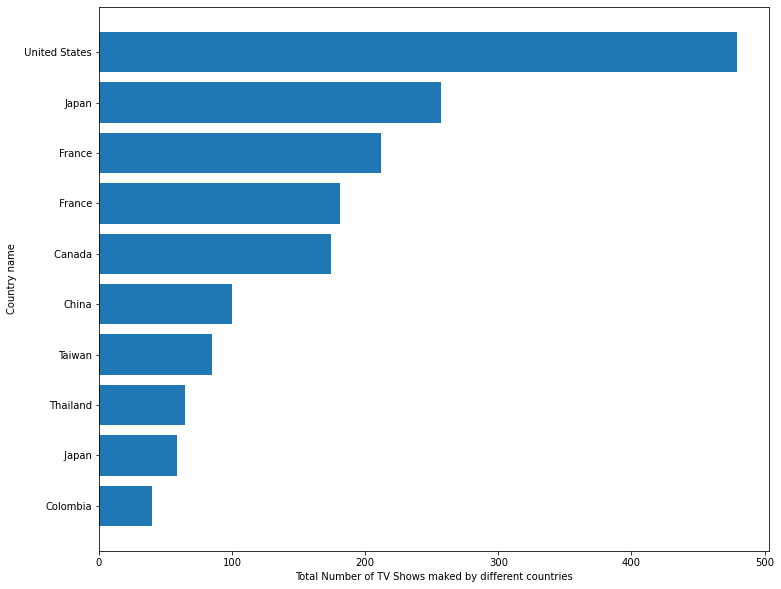

In [24]:
# total no. tv shows by different countries
plt.figure(figsize=(12,10))
country_with_tvShow=country.sort_values(by=['Total Count'], ascending=False)
country_with_Top10_tvShow=country_with_tvShow[country_with_movies['type']=='TV Show'].head(10)
country_with_Top10_tvShow=country_with_Top10_tvShow.sort_values(by=['Total Count'])
plt.barh(country_with_Top10_tvShow['Country'],country_with_Top10_tvShow['Total Count'])
plt.xlabel('Total Number of TV Shows maked by different countries')
plt.ylabel('Country name')
plt.show()

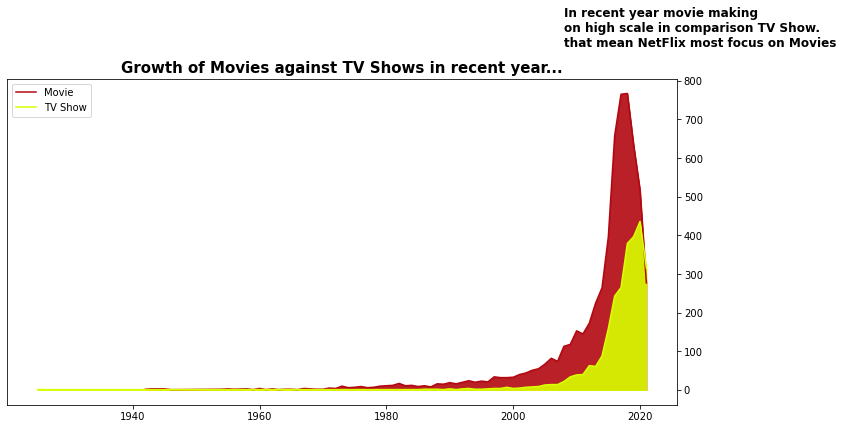

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#d9ff00"]
type_feature=['Movies','Tv Shows']
for i, mtv in enumerate(data['type'].value_counts().index):
    mtv_rel = data[data['type']==mtv]['release_year'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel,color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index,mtv_rel, color=color[i],alpha=0.9)
    ax.yaxis.set_ticks_position("right")
    plt.legend(loc='upper left')
# plt.legend(['Movie','TV Show'])
plt.title('Growth of Movies against TV Shows in recent year...',fontweight='bold',fontsize=15)
plt.text(x=2008,y=888,s='In recent year movie making\non high scale in comparison TV Show.\nthat mean NetFlix most focus on Movies',fontweight='bold',fontsize=12)
plt.show()

In [26]:
# info by  movie name

In [27]:
data[data["title"]=='Dick Johnson Is Dead']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast Specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [28]:
def movie_info(name):
    infom=data[data["title"]==name].T
    infom.columns=['info']
    print(infom)

In [29]:
#Content Based Recommendations

We won't use all the columns or features for this notebook. So then, the recommendation that we give to the users will only consider the information contained in the following columns:

Type

Director

Rating

Listed_in

Description

In [30]:
new_data = data[['title', 'type', 'director', 'cast', 'rating', 'listed_in', 'description']]
new_data.set_index('title', inplace=True)
new_data.head()

,type,director,cast,rating,listed_in,description
title,,,,,,
Dick Johnson Is Dead,Movie,Kirsten Johnson,No Cast Specified,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
Blood & Water,TV Show,No Director Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
Ganglands,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
Jailbirds New Orleans,TV Show,No Director Specified,No Cast Specified,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
Kota Factory,TV Show,No Director Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [31]:
# For director, cast, and listed_in
# Because there is more than 1 people and categories
# We don't want if people share the same first or last name consider the same person
# or the word that appear in many categories (TV, etc) consider the same category
def separate(texts):
    t = []
    for text in texts.split(','):
        t.append(text.replace(' ', '').lower())
    return ' '.join(t)

def remove_space(texts):
    return texts.replace(' ', '').lower()

def remove_punc(texts):
    return texts.translate(str.maketrans('','',string.punctuation)).lower()

In [32]:
new_data['type'] = new_data['type'].apply(remove_space)
new_data['director'] = new_data['director'].apply(separate)
new_data['cast'] = new_data['cast'].apply(separate)
new_data['rating'] = new_data['rating'].apply(remove_space)
new_data['listed_in'] = new_data['listed_in'].apply(separate)
new_data['description'] = new_data['description'].apply(remove_punc)

new_data.head()

,type,director,cast,rating,listed_in,description
title,,,,,,
Dick Johnson Is Dead,movie,kirstenjohnson,nocastspecified,pg-13,documentaries,as her father nears the end of his life filmma...
Blood & Water,tvshow,nodirectorspecified,amaqamata khosingema gailmabalane thabangmolab...,tv-ma,internationaltvshows tvdramas tvmysteries,after crossing paths at a party a cape town te...
Ganglands,tvshow,julienleclercq,samibouajila tracygotoas samueljouy nabihaakka...,tv-ma,crimetvshows internationaltvshows tvaction&adv...,to protect his family from a powerful drug lor...
Jailbirds New Orleans,tvshow,nodirectorspecified,nocastspecified,tv-ma,docuseries realitytv,feuds flirtations and toilet talk go down amon...
Kota Factory,tvshow,nodirectorspecified,mayurmore jitendrakumar ranjanraj alamkhan ahs...,tv-ma,internationaltvshows romantictvshows tvcomedies,in a city of coaching centers known to train i...


In [33]:
new_data['bag_of_words'] = ''

# Combine all the words into 1 column
for i, row in enumerate(new_data.iterrows()):
    string = ''
    for col in new_data.columns:
        if row[1][col] == '':
            continue
        else:
            string += row[1][col] + ' '
            new_data['bag_of_words'][i] = string.strip()

new_data.drop(new_data.columns[:-1], axis=1, inplace=True)

In [34]:
new_data.head()

,bag_of_words
title,
Dick Johnson Is Dead,movie kirstenjohnson nocastspecified pg-13 doc...
Blood & Water,tvshow nodirectorspecified amaqamata khosingem...
Ganglands,tvshow julienleclercq samibouajila tracygotoas...
Jailbirds New Orleans,tvshow nodirectorspecified nocastspecified tv-...
Kota Factory,tvshow nodirectorspecified mayurmore jitendrak...


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
tfid = TfidfVectorizer()
tfid_matrix = tfid.fit_transform(new_data['bag_of_words'])


In [37]:
cosine_sim = cosine_similarity(tfid_matrix, tfid_matrix)
cosine_sim

array([[1.00000000e+00, 6.46237828e-03, 2.50216298e-02, ...,
        1.21826649e-02, 2.28609676e-02, 3.58474201e-02],
       [6.46237828e-03, 1.00000000e+00, 1.02075254e-02, ...,
        1.37156951e-03, 0.00000000e+00, 7.43705522e-04],
       [2.50216298e-02, 1.02075254e-02, 1.00000000e+00, ...,
        7.24113933e-03, 7.20724594e-03, 4.24706786e-02],
       ...,
       [1.21826649e-02, 1.37156951e-03, 7.24113933e-03, ...,
        1.00000000e+00, 1.99151646e-02, 5.30624945e-03],
       [2.28609676e-02, 0.00000000e+00, 7.20724594e-03, ...,
        1.99151646e-02, 1.00000000e+00, 4.54423376e-03],
       [3.58474201e-02, 7.43705522e-04, 4.24706786e-02, ...,
        5.30624945e-03, 4.54423376e-03, 1.00000000e+00]])

In [38]:
# Later on we will combine with similarity as a column
final_data = data[['title', 'type']]

In [39]:
indices = pd.Series(data.index, index=data['title']).drop_duplicates()

In [40]:
def content_based_recommendation(title, total_result=5, threshold=0.5):
    # Get the index
    idx = final_data[final_data['title'] == title].index[0]
    # Create a new column for similarity, the value is different for each title you input
    final_data['similarity'] = cosine_sim[idx]
    sort_final_data = final_data.sort_values(by='similarity', ascending=False)[1:total_result+1]
    
    # You can set a threshold if you want to norrow the result down 
    #sort_final_data = sort_final_data[sort_final_data['similarity'] > threshold]
    
    # Is the title a movie or tv show?
    movies = sort_final_data['title'][sort_final_data['type'] == 'Movie']
    tv_shows = sort_final_data['title'][sort_final_data['type'] == 'TV Show']
    
    if len(movies) != 0:
        print('Similar Movie(s) list:')
        for i, movie in enumerate(movies):
            print('{}. {}'.format(i+1, movie))
        print()
    else:
        print('Similar Movie(s) list:')
        print('-\n')
        
    if len(tv_shows) != 0:
        print('Similar TV_show(s) list:')
        for i, tv_show in enumerate(tv_shows):
            print('{}. {}'.format(i+1, tv_show))
    else:
        print('Similar TV_show(s) list:')
        print('-')

In [41]:
content_based_recommendation("Blood & Water")

Similar Movie(s) list:
1. Walk Away from Love
2. Mom

Similar TV_show(s) list:
1. Lion Pride
2. Forget Me Not
3. 20 Minutes


In [42]:
# while(True):
print("Press 1 for info of a movie or show: ")
print("Press 2 for movie or show recomendation: ")
print("Press 3 for exit")

Press 1 for info of a movie or show: 
Press 2 for movie or show recomendation: 
Press 3 for exit


In [44]:
while(True):
    choice=input("Enter your choice: ")
    if choice=="1":
        a=input("enter the movie/tv show name: ")
        movie_info(a)
        print("---------------------------------------------------------------------------------------------------------------")
        
    elif choice=="2":
        a=input("Enter thr movie/tv show() name: ")
        content_based_recommendation(a)
        print("---------------------------------------------------------------------------------------------------------------")
        
    elif choice=="3":
        break
    else:
        print("Enter a valid chocie")
        print("---------------------------------------------------------------------------------------------------------------")

Enter your choice: 1
enter the movie/tv show name: Kota Factory
                                                           info
show_id                                                      s5
type                                                    TV Show
title                                              Kota Factory
director                                  No Director Specified
cast          Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
country                                                   India
date_added                                   September 24, 2021
release_year                                               2021
rating                                                    TV-MA
duration                                              2 Seasons
listed_in     International TV Shows, Romantic TV Shows, TV ...
description   In a city of coaching centers known to train I...
--------------------------------------------------------------------------------------------------------